In [46]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [100, 100]

In [4]:
train_path = '/home/fasal/projects/Github/classification_tensorflow_pretrained/dataset/train'
valid_path = '/home/fasal/projects/Github/classification_tensorflow_pretrained/dataset/train'

In [5]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

2023-02-10 20:22:03.865608: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-10 20:22:03.866034: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-10 20:22:03.866051: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fasal-HP-240-G8-Notebook-PC): /proc/driver/nvidia/version does not exist
2023-02-10 20:22:03.866637: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
for layer in vgg.layers:
  layer.trainable = False

In [7]:
folders = glob('/home/fasal/projects/Github/classification_tensorflow_pretrained/dataset/train/*')

In [8]:
len(folders)

2

In [9]:
x = Flatten()(vgg.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

In [11]:
model = Model(inputs=vgg.input, outputs=prediction)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [13]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [45]:
from keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [16]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
training_set = train_datagen.flow_from_directory('/home/fasal/projects/Github/classification_tensorflow_pretrained/dataset/train',
                                                 target_size = (100, 100),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1594 images belonging to 2 classes.


In [18]:
len(training_set)

50

In [19]:
test_set = test_datagen.flow_from_directory('/home/fasal/projects/Github/classification_tensorflow_pretrained/dataset/test',
                                            target_size = (100, 100),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 406 images belonging to 2 classes.


In [20]:
len(test_set)

13

In [21]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/tmp/ipykernel_40132/177326590.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
50/50 [==============================] - 49s 977ms/step - loss: 0.5001 - accuracy: 0.7378 - val_loss: 0.4418 - val_accuracy: 0.8005
Epoch 2/10
50/50 [==============================] - 53s 1s/step - loss: 0.3750 - accuracy: 0.8306 - val_loss: 0.4235 - val_accuracy: 0.8054
Epoch 3/10
50/50 [==============================] - 51s 1s/step - loss: 0.3383 - accuracy: 0.8463 - val_loss: 0.3870 - val_accuracy: 0.8325
Epoch 4/10
50/50 [==============================] - 51s 1s/step - loss: 0.3178 - accuracy: 0.8645 - val_loss: 0.3847 - val_accuracy: 0.8227
Epoch 5/10
50/50 [==============================] - 51s 1s/step - loss: 0.2820 - accuracy: 0.8770 - val_loss: 0.3792 - val_accuracy: 0.8276
Epoch 6/10
50/50 [==============================] - 53s 1s/step - loss: 0.2806 - accuracy: 0.8821 - val_loss: 0.3766 - val_accuracy: 0.8374
Epoch 7/10
50/50 [==============================] - 52s 1s/step - loss: 0.2592 - accuracy: 0.8934 - val_loss: 0.4593 - val_accuracy: 0.7980
Epoch 8/10
50/50 

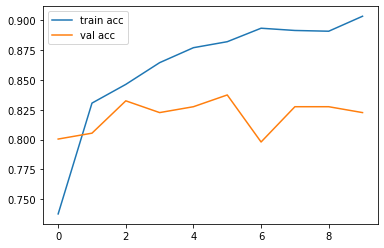

<Figure size 432x288 with 0 Axes>

In [22]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('Test&Val_acc')

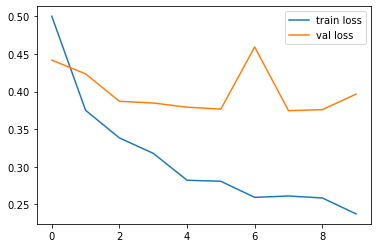

<Figure size 432x288 with 0 Axes>

In [23]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [26]:
X_train, y_train = next(training_set)
X_test, y_test = next(test_set)

In [27]:
y_predict=model.predict(X_test)

1/1 [==============================] - 1s 799ms/step


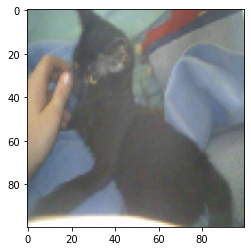

1/1 [==============================] - 0s 63ms/step
[0]
It is a Cat


In [42]:
import numpy as np
import random

idx = random.randint(0,len(X_test))
plt.imshow(X_test[idx, :])
plt.show()

y_predict = model.predict(X_test[idx, :].reshape(1,100,100,3))
y_class=[np.argmax(element) for element in y_predict]
print(y_class)


if y_class[0]==0:
    result='It is a Cat'
else:
    result='It is a Dog'
print(result)

In [47]:
import session_info

In [48]:
session_info.show()